## Definition
The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement , then the distribution of the sample means will be approximately normally distributed

### Let's try to prove this

# Central Limit Theorem in action

### Part 1 : Imports

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

### Part 2 : Sample data generation

#### Uniform Distribution

In [2]:
def generate_uniform(a, b, count = 1000):
    return np.arange(a,b,(b-a)/count)

##### Example of Uniform Distribution using our function

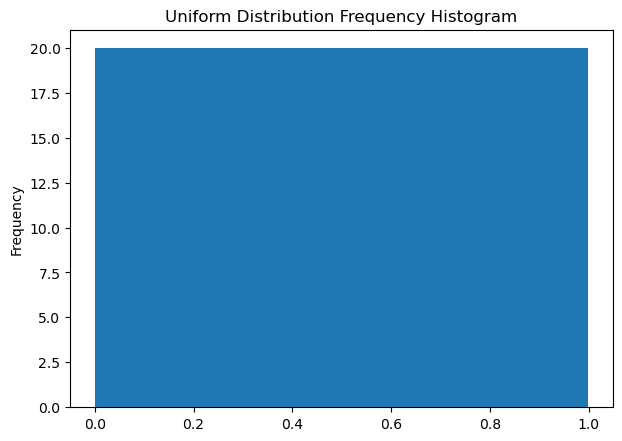

In [3]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

data = generate_uniform(0,1)
plt.hist(data, bins=50)
plt.gca().set(title='Uniform Distribution Frequency Histogram', ylabel='Frequency');

#### Binomial Distribution

In [4]:
def generate_binomial(trials, propability, count = 1000):
    return np.random.binomial(trials, propability, count)

##### Example of Binomial Distribution using our function

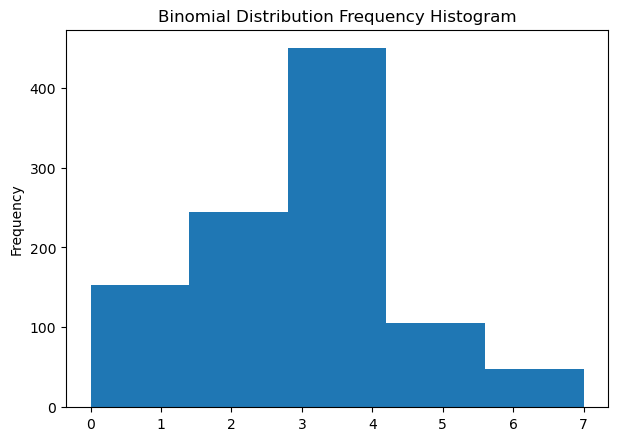

In [5]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

coin_flips = 10
probability = 0.3

data = generate_binomial(coin_flips,probability)
plt.hist(data, bins=5)
plt.gca().set(title='Binomial Distribution Frequency Histogram', ylabel='Frequency');

This is the example of Coin Flip 
We flip a coin 10 times
The probability of getting a head is 0.3 (This is a biased coin)
We repeat this experiment 1000 times

As we can see, in the majority of cases, we receive around 2 to 3 heads

#### Normal Distribution

In [6]:
def generate_normal(my, sigma, count = 1000):
    return np.random.normal(mu, sigma, count)

##### Example of Normal Distribution using our function

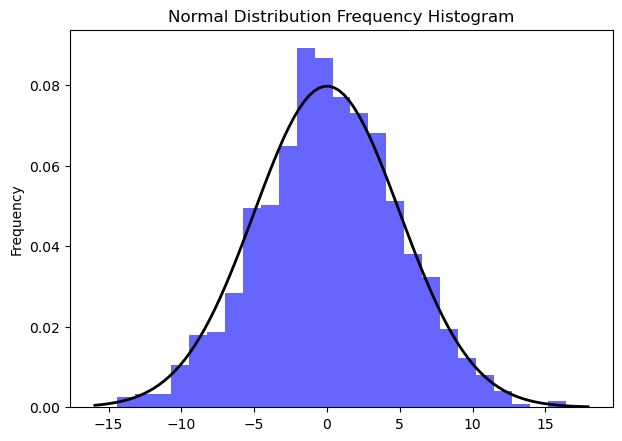

In [7]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

mu = 0
sigma = 5

data = generate_normal(mu, sigma)
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
  
plt.plot(x, p, 'k', linewidth=2)
plt.gca().set(title='Normal Distribution Frequency Histogram', ylabel='Frequency');

#### Poisson Distribution

In [8]:
def generate_poission(lam, count=10000):
    return np.random.poisson(lam, count)

##### Example of Poission Distribution using our function

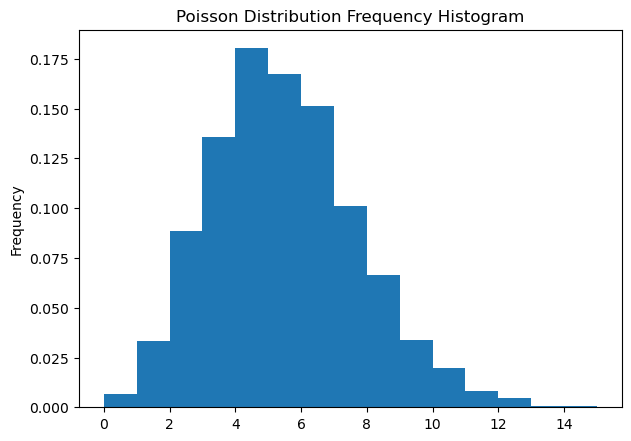

In [9]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

lam = 5

data = generate_poission(lam)
plt.hist(data, bins=15, density=True)
plt.gca().set(title='Poisson Distribution Frequency Histogram', ylabel='Frequency');

#### Exponential Distribution

In [10]:
def generate_exponential(scale, count = 10000):
    return np.random.exponential(scale, count)

##### Example of Exponential Distribution using our function

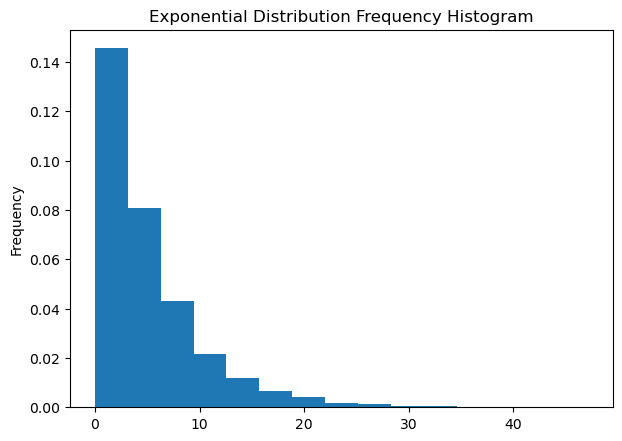

In [11]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

scale = 5

data = generate_exponential(scale)
plt.hist(data, bins=15, density=True)
plt.gca().set(title='Exponential Distribution Frequency Histogram', ylabel='Frequency');

### Sampling Data

#### Generate a random sample from provided array

In [12]:
def get_sample(data):
    size = int(len(data)/10)
    return np.random.choice(data, size)

#### Plot the provided distribution, and the distribution of the average across 10000 random sampling

In [13]:
def plot_histo(ax, data, bins=5, color='r', alpha=0.6, label = None):
    ax.hist(data, bins=bins, color = color, alpha = alpha, label = label,density=True)
    if label != None:
        ax.legend()
    return ax
    
def plot_normal_curve(ax, data, label = None):
    mu, std = norm.fit(data) 
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2, label = label)
    if label != None:
        ax.legend()
    return ax

def plot(distribution, data):
    averages = [ np.average(get_sample(data)) for i in range(10000) ]
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    ax[0] = plot_histo(ax[0],data, bins=50, label = f'{distribution} Data')
    ax[0].set_ylabel("Frequency")
    ax[0].set_title(f"{distribution} Data")
    ax[1] = plot_histo(ax[1],averages, bins=50, label = f'Average of {distribution} Data')
    ax[1] = plot_normal_curve(ax[1], averages, label = 'Normal Distribution Curve')
    ax[1].set_ylabel("Frequency")
    ax[1].set_title(f"Average of {distribution} Data")

#### Uniform Distribution

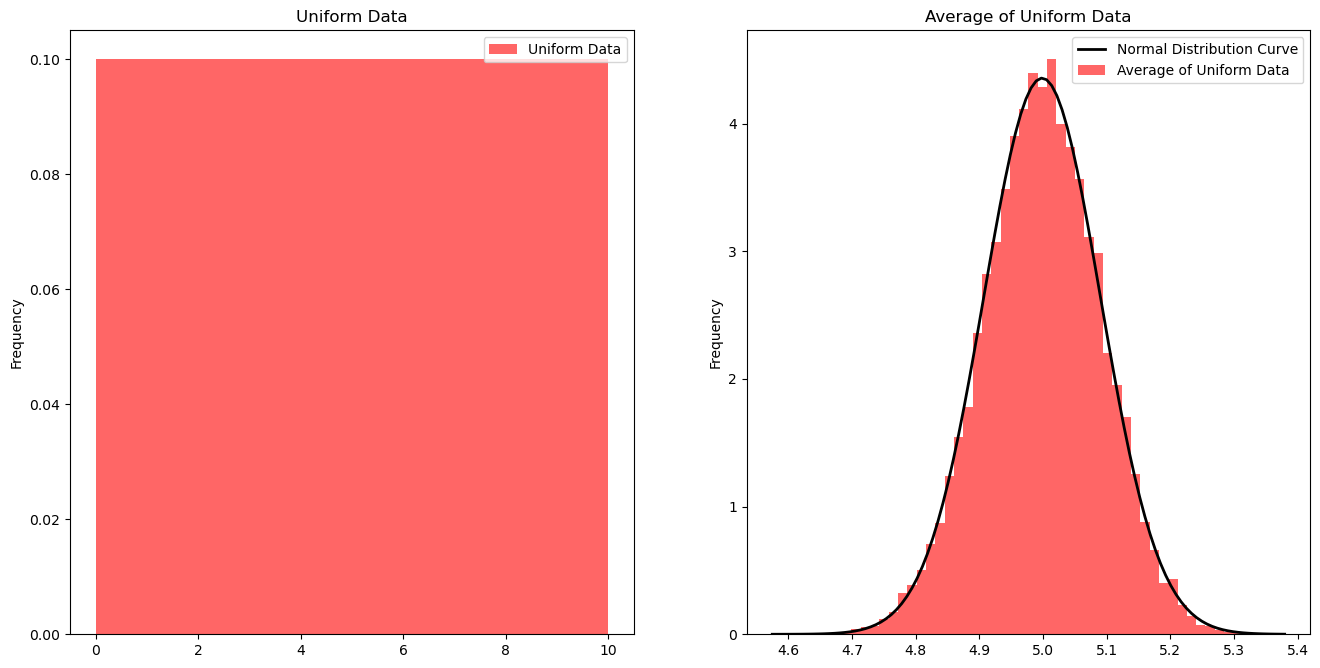

In [14]:
data = generate_uniform(0,10,10000)
plot('Uniform', data)

#### Binomial Distribution

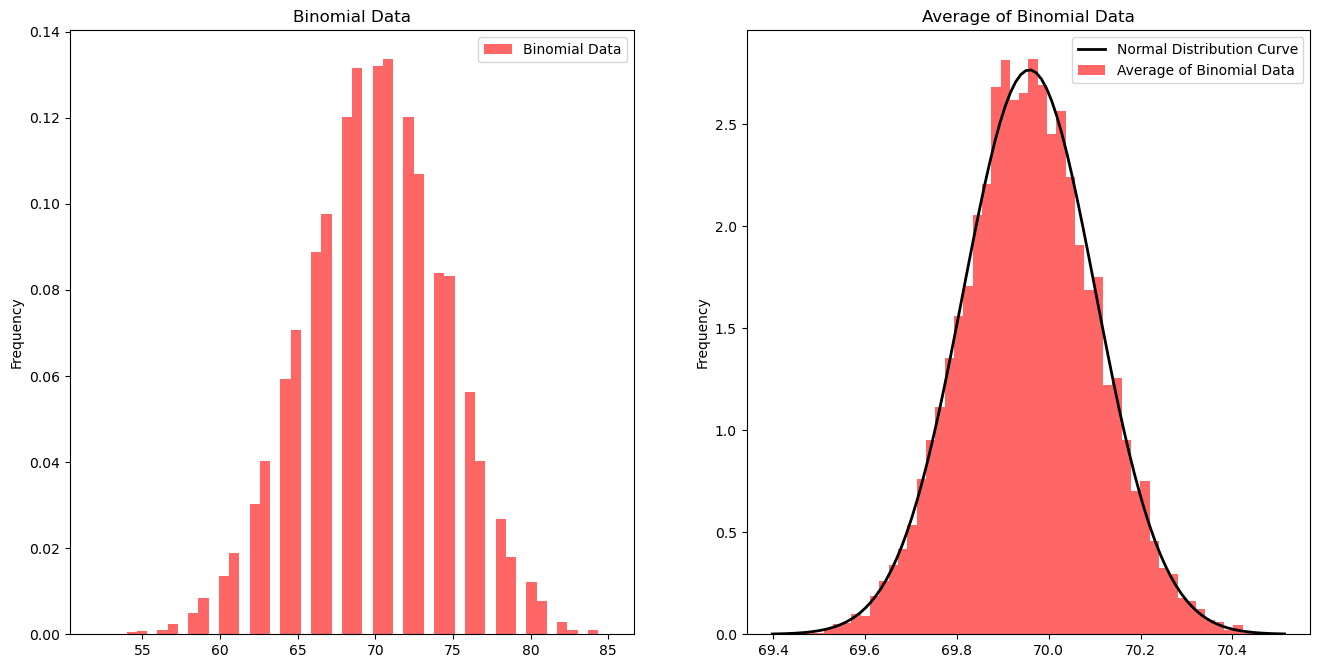

In [15]:
coin_flips = 100
probability = 0.7

data = generate_binomial(coin_flips,probability,10000)
plot('Binomial', data)

#### Normal Distribution

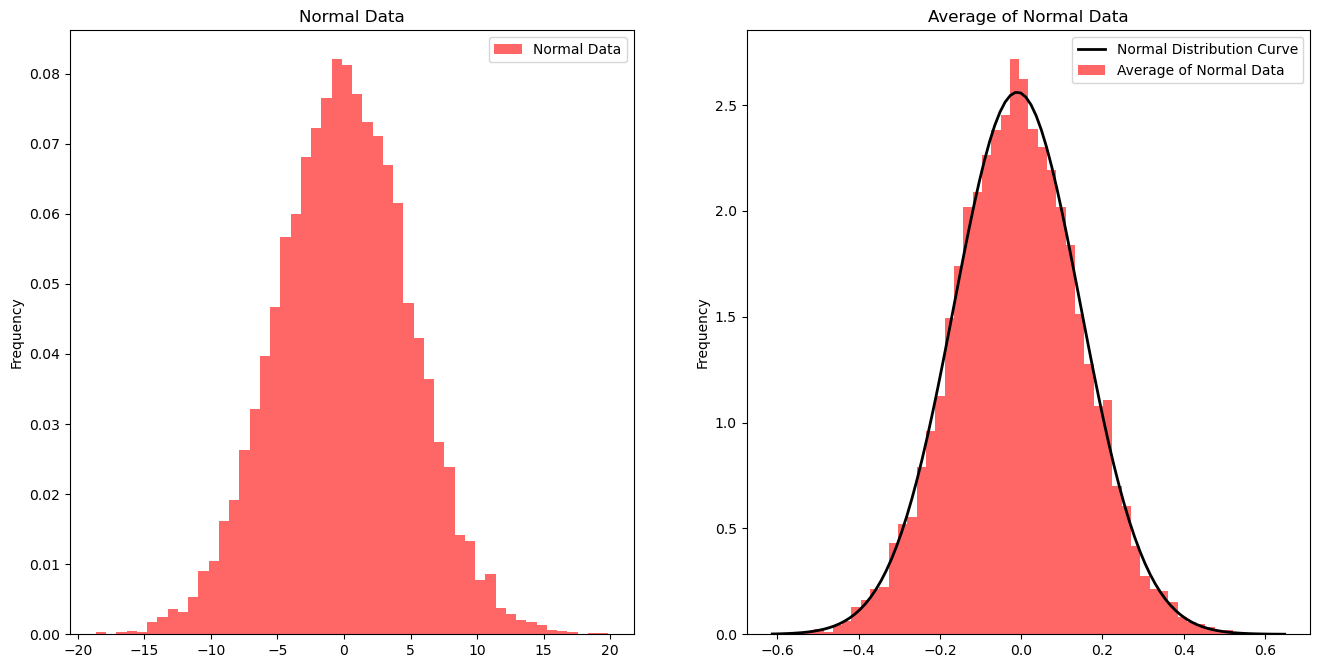

In [16]:
mu = 0
sigma = 5

data = generate_normal(mu, sigma, 10000)
plot('Normal', data)

#### Poisson Distribution

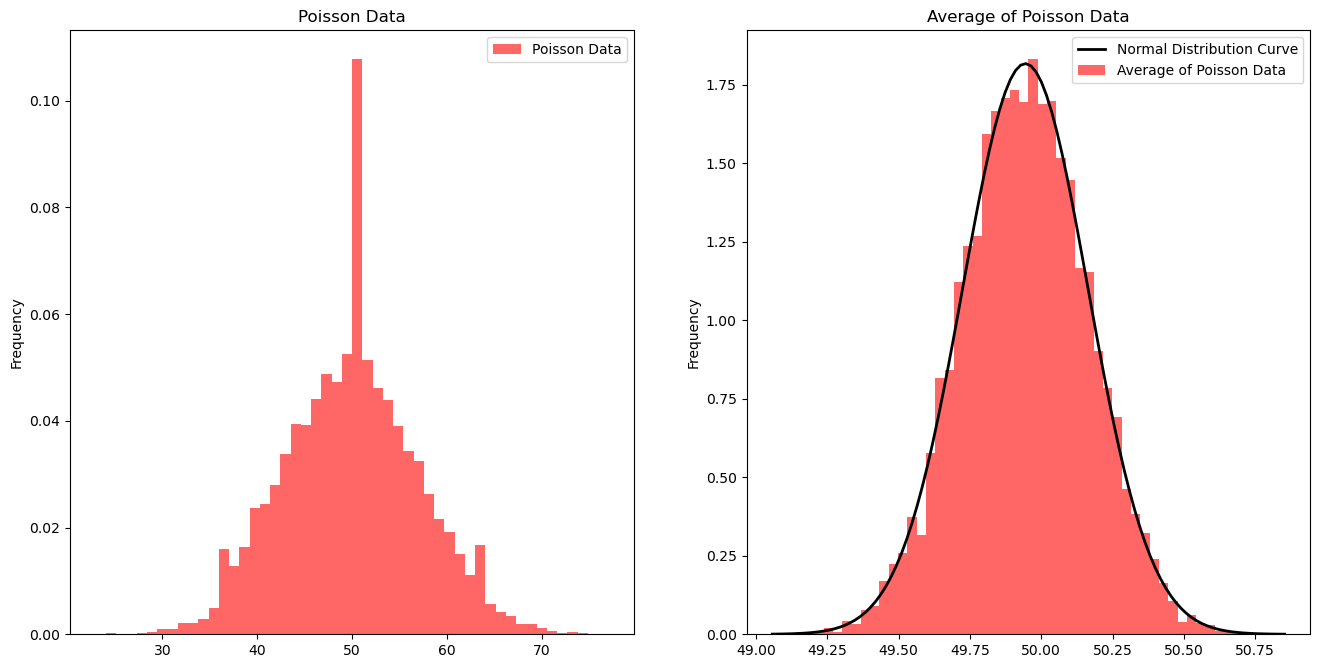

In [17]:
lam = 50

data = generate_poission(lam, 10000)
plot('Poisson', data)

#### Exponential Distribution

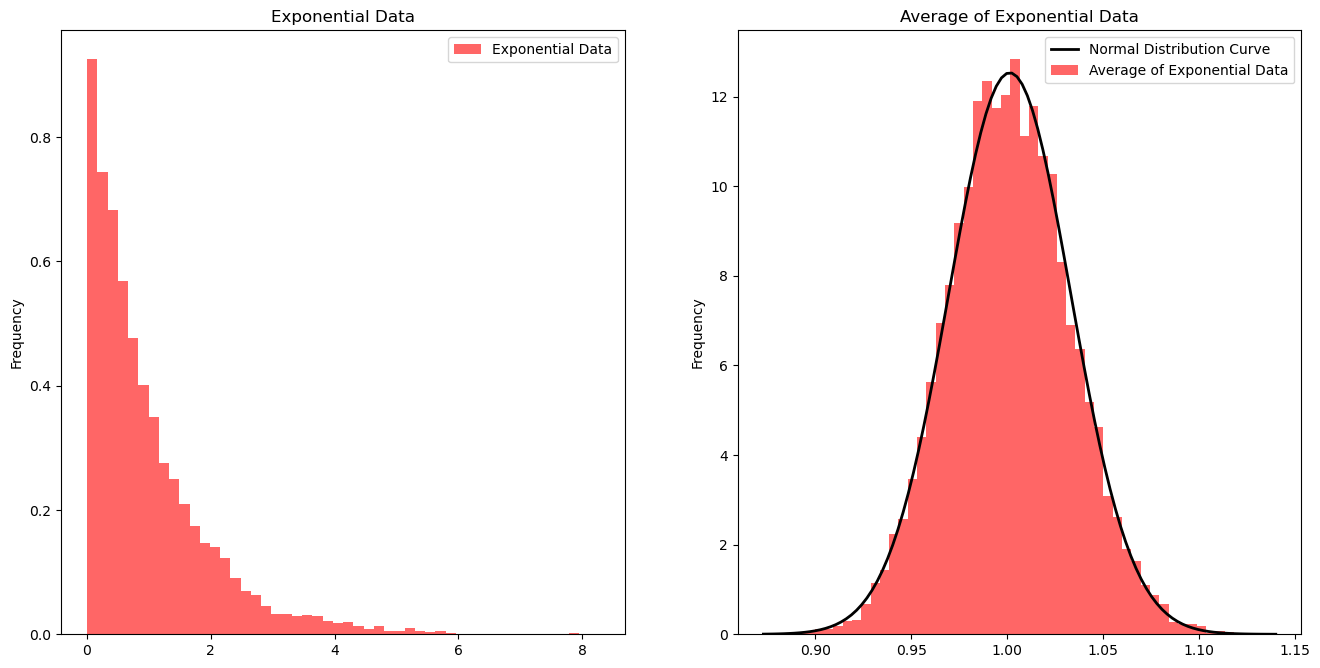

In [18]:
scale = 1

data = generate_exponential(scale)
plot('Exponential', data)